In [ ]:
import os
import cv2

   # Specify the folder path
folder_path = '/content/sample_data'

   # List to store images
images = []

   # Loop through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Add more formats if needed
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        images.append(img)



In [ ]:
len(images)

2

In [ ]:
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)

array([[150, 155, 145, ..., 158, 159, 162],
       [151, 141, 144, ..., 138, 136, 162],
       [137, 151, 158, ..., 163, 164, 153],
       ...,
       [163, 170, 155, ..., 109, 142, 156],
       [148, 159, 146, ..., 134, 154, 167],
       [147, 149, 154, ..., 123,  89, 151]], dtype=uint8)
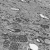

In [ ]:
images[1]

In [ ]:
## Generating the graph of the network
def RecurNet(img, c, s, Theta):
    # size of the image
    m, n = img.shape
    # generate the node list
    Mx = np.arange(1, m + 1)
    My = np.arange(1, n + 1)
    X, Y = np.meshgrid(Mx, My)
    X = X.flatten()
    Y = Y.flatten()
    # node list
    V = np.column_stack((X, Y, img.flatten()))
    V = V[V[:, 2] >= c, :]
    l = V.shape[0]
    # state range
    R = np.max(V[:, 2]) - np.min(V[:, 2])
    # edge list
    F, T = np.meshgrid(np.arange(1, l + 1), np.arange(1, l + 1))
    F = F.flatten()
    T = T.flatten()
    E = np.column_stack((F, T))  # X:start, Y:end
    E = E[E[:, 0] < E[:, 1], :]
    # state difference in percentage
    S_diff = np.abs(V[E[:, 0] - 1, 2] - V[E[:, 1] - 1, 2]) / R
    Ipq = 1 - S_diff
    # distance
    S_dist = np.sqrt((V[E[:, 0] - 1, 0] - V[E[:, 1] - 1, 0]) ** 2 +
                     (V[E[:, 0] - 1, 1] - V[E[:, 1] - 1, 1]) ** 2)
    # Gaussian diminishing effect
    factor_norm = norm.pdf(0, 0, s)
    Dpq = norm.pdf(S_dist, 0, s) / factor_norm
    Wpq = Ipq * Dpq
    E = np.column_stack((E, Wpq))
    E = E[E[:, 2] > Theta, :]
    # Generate Recurrence Network
    G = nx.Graph()
    G.add_weighted_edges_from(E[:, :3])
    return G

In [ ]:
import numpy as np
import networkx as nx

def NetStatL(G):
    # Network Statistics

    K = np.array(list(dict(G.degree()).values()))  # degree


    PL = nx.all_pairs_shortest_path_length(G)
    PL = dict(nx.all_pairs_shortest_path_length(G))
    max_length = max(len(lengths) for lengths in PL.values())
    PL_array = np.array([list(lengths.values()) + [np.nan] * (max_length - len(lengths)) for lengths in PL.values()])

    m, n = PL_array.shape
    for i in range(n - 1):
        PL_array[i + 1:m, i] = 0
    PL_array = PL_array.flatten()
    PL_array = PL_array[PL_array > 0]
    PL_array = PL_array[PL_array != np.inf]
    le = np.mean(PL_array)

    BC = nx.betweenness_centrality(G)  # betweenness centrality

    return K, le, BC

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

def NetFeature(K, le, PC, BC, CC):
    # Degree K
    stat_K_Q0 = np.min(K)
    stat_K_Q1 = np.quantile(K, 0.25)
    stat_K_Q2 = np.quantile(K, 0.50)
    stat_K_Q3 = np.quantile(K, 0.75)
    stat_K_Q4 = np.max(K)
    stat_K_mean = np.mean(K)
    stat_K_sd = np.std(K)
    stat_K_skew = skew(K)
    stat_K_kurtosis = kurtosis(K)

    # Shortest Path: L
    stat_L_Q0 = np.min(le)
    stat_L_Q1 = np.quantile(le, 0.25)
    stat_L_Q2 = np.quantile(le, 0.50)
    stat_L_Q3 = np.quantile(le, 0.75)
    stat_L_Q4 = np.max(le)
    stat_L_mean = np.mean(le)
    stat_L_sd = np.std(le)
    stat_L_skew = skew(le)
    stat_L_kurtosis = kurtosis(le)



    # Pagerank Centrality: PC
    PC = np.array(list(PC.values()))
    stat_PC_Q0 = np.min(PC)
    stat_PC_Q1 = np.quantile(PC, 0.25)
    stat_PC_Q2 = np.quantile(PC, 0.50)
    stat_PC_Q3 = np.quantile(PC, 0.75)
    stat_PC_Q4 = np.max(PC)
    stat_PC_mean = np.mean(PC)
    stat_PC_sd = np.std(PC)
    stat_PC_skew = skew(PC)
    stat_PC_kurtosis = kurtosis(PC)

    # Betweenness Centrality: BC
    BC = np.array(list(BC.values()))
    stat_BC_Q0 = np.min(BC)
    stat_BC_Q1 = np.quantile(BC, 0.25)
    stat_BC_Q2 = np.quantile(BC, 0.50)
    stat_BC_Q3 = np.quantile(BC, 0.75)
    stat_BC_Q4 = np.max(BC)
    stat_BC_mean = np.mean(BC)
    stat_BC_sd = np.std(BC)
    stat_BC_skew = skew(BC)
    stat_BC_kurtosis = kurtosis(BC)

    # Closeness Centrality: CC
    CC = np.array(list(CC.values()))
    stat_CC_Q0 = np.min(CC)
    stat_CC_Q1 = np.quantile(CC, 0.25)
    stat_CC_Q2 = np.quantile(CC, 0.50)
    stat_CC_Q3 = np.quantile(CC, 0.75)
    stat_CC_Q4 = np.max(CC)
    stat_CC_mean = np.mean(CC)
    stat_CC_sd = np.std(CC)
    stat_CC_skew = skew(CC)
    stat_CC_kurtosis = kurtosis(CC)

    T = [stat_K_Q0, stat_K_Q1, stat_K_Q2, stat_K_Q3, stat_K_Q4,
         stat_K_mean, stat_K_sd, stat_K_skew, stat_K_kurtosis,
         stat_L_Q0, stat_L_Q1, stat_L_Q2, stat_L_Q3, stat_L_Q4,
         stat_PC_Q0, stat_PC_Q1, stat_PC_Q2, stat_PC_Q3, stat_PC_Q4,
         stat_PC_mean, stat_PC_sd, stat_PC_skew, stat_PC_kurtosis,
         stat_BC_Q0, stat_BC_Q1, stat_BC_Q2, stat_BC_Q3, stat_BC_Q4,
         stat_BC_mean, stat_BC_sd, stat_BC_skew, stat_BC_kurtosis,
         stat_CC_Q0, stat_CC_Q1, stat_CC_Q2, stat_CC_Q3, stat_CC_Q4,
         stat_CC_mean, stat_CC_sd, stat_CC_skew, stat_CC_kurtosis]

    Tn = pd.DataFrame([T], columns=[
        'stat_K_Q0', 'stat_K_Q1', 'stat_K_Q2', 'stat_K_Q3', 'stat_K_Q4',
        'stat_K_mean', 'stat_K_sd', 'stat_K_skew', 'stat_K_kurtosis',
        'stat_L_Q0', 'stat_L_Q1', 'stat_L_Q2', 'stat_L_Q3', 'stat_L_Q4',
        'stat_L_mean', 'stat_L_sd', 'stat_L_skew', 'stat_L_kurtosis',
        'stat_PC_Q0', 'stat_PC_Q1', 'stat_PC_Q2', 'stat_PC_Q3', 'stat_PC_Q4',
        'stat_PC_mean', 'stat_PC_sd', 'stat_PC_skew', 'stat_PC_kurtosis',
        'stat_BC_Q0', 'stat_BC_Q1', 'stat_BC_Q2', 'stat_BC_Q3', 'stat_BC_Q4',
        'stat_BC_mean', 'stat_BC_sd', 'stat_BC_skew', 'stat_BC_kurtosis',
        'stat_CC_Q0', 'stat_CC_Q1', 'stat_CC_Q2', 'stat_CC_Q3', 'stat_CC_Q4',
        'stat_CC_mean', 'stat_CC_sd', 'stat_CC_skew', 'stat_CC_kurtosis'
    ])

    return Tn, T

In [ ]:
from scipy.stats import norm

In [ ]:
G = []
K = []
le = []
EC = []
PC = []
BC = []
CC = []

for i in range(len(images)):
    G.append(RecurNet(images[i], 0, 10, 0.85))  # Assuming RecurNet returns a graph


In [ ]:
G

In [ ]:
k=[]
for i in range(len(images)):
    k.append( np.array(list(dict(G[i].degree()).values())))  # Assuming RecurNet returns a graph

In [ ]:
 def cpl(G):
  PL = nx.all_pairs_shortest_path_length(G)
  PL = dict(nx.all_pairs_shortest_path_length(G))
  max_length = max(len(lengths) for lengths in PL.values())
  PL_array = np.array([list(lengths.values()) + [np.nan] * (max_length - len(lengths)) for lengths in PL.values()])

  m, n = PL_array.shape
  for i in range(n - 1):
      PL_array[i + 1:m, i] = 0
  PL_array = PL_array.flatten()
  PL_array = PL_array[PL_array > 0]
  PL_array = PL_array[PL_array != np.inf]
  le = np.mean(PL_array)
  return le



In [ ]:
PLli=[]
for i in range(len(images)):
  PLli.append(cpl(G[i]))

In [ ]:
k[1]

array([20, 21, 26, ..., 14,  2, 14])

In [ ]:
np.mean(betC[1])


0.002284495818024999

In [ ]:
betC=[]
for i in range(len(images)):
  betC.append(nx.betweenness_centrality(G[i]))

In [ ]:
betC = [list(d.values()) for d in betC]
betC

[[4.249426867868667e-07,
  4.328477445575694e-06,
  0.0,
  0.0,
  2.6860791109260488e-05,
  3.0087129116521387e-05,
  2.6064669653810112e-05,
  2.8657601452830123e-05,
  9.527933407077776e-05,
  7.205893535638568e-05,
  0.00013988419423452373,
  0.00017195050344670363,
  0.00025804391274298114,
  0.00027230519823621334,
  0.00011976181188962562,
  0.00029604761577459946,
  0.00013940894238220064,
  0.00047286592866934725,
  0.00019829842450352336,
  0.00023835966945760217,
  0.0001067013507805243,
  0.00021548035242082664,
  0.00011870737661348485,
  0.00017002497204555788,
  5.0406749934332595e-05,
  2.8978869093769166e-05,
  0.0002951220145313459,
  0.0006170194936723693,
  9.18485088785536e-05,
  0.0,
  0.00037002293443920105,
  9.659373017868659e-05,
  2.8298670037384363e-05,
  3.4665505558215464e-05,
  0.00012782749411082933,
  0.00017596134304940036,
  0.0001218866332601779,
  0.00038251788369936355,
  8.726535814369523e-05,
  0.00013599569247103163,
  0.00013485196678846782,
  0

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

def NetFeature(k, PLli, betC):
    # Degree K
    stat_K_Q0 = np.min(k)
    stat_K_Q1 = np.quantile(k, 0.25)
    stat_K_Q2 = np.quantile(k, 0.50)
    stat_K_Q3 = np.quantile(k, 0.75)
    stat_K_Q4 = np.max(k)
    stat_K_mean = np.mean(k)
    stat_K_sd = np.std(k)
    stat_K_skew = skew(k)
    stat_K_kurtosis = kurtosis(k)

    # Shortest Path: L
    stat_L_Q0 = np.min(PLli)
    stat_L_Q1 = np.quantile(PLli, 0.25)
    stat_L_Q2 = np.quantile(PLli, 0.50)
    stat_L_Q3 = np.quantile(PLli, 0.75)
    stat_L_Q4 = np.max(PLli)
    stat_L_mean = np.mean(PLli)
    stat_L_sd = np.std(PLli)
    stat_L_skew = skew(PLli)
    stat_L_kurtosis = kurtosis(PLli)

    # Betweenness Centrality: BC
    stat_BC_Q0 = np.min(betC)
    stat_BC_Q1 = np.quantile(betC, 0.25)
    stat_BC_Q2 = np.quantile(betC, 0.50)
    stat_BC_Q3 = np.quantile(betC, 0.75)
    stat_BC_Q4 = np.max(betC)
    stat_BC_mean = np.mean(betC)
    stat_BC_sd = np.std(betC)
    stat_BC_skew = skew(betC)
    stat_BC_kurtosis = kurtosis(betC)

    T = [
        stat_K_Q0, stat_K_Q1, stat_K_Q2, stat_K_Q3, stat_K_Q4,
        stat_K_mean, stat_K_sd, stat_K_skew, stat_K_kurtosis,
        stat_L_Q0, stat_L_Q1, stat_L_Q2, stat_L_Q3, stat_L_Q4,
        stat_L_mean, stat_L_sd, stat_L_skew, stat_L_kurtosis,
        stat_BC_Q0, stat_BC_Q1, stat_BC_Q2, stat_BC_Q3, stat_BC_Q4,
        stat_BC_mean, stat_BC_sd, stat_BC_skew, stat_BC_kurtosis
    ]

    Tn = pd.DataFrame([T], columns=[
        'stat_K_Q0', 'stat_K_Q1', 'stat_K_Q2', 'stat_K_Q3', 'stat_K_Q4',
        'stat_K_mean', 'stat_K_sd', 'stat_K_skew', 'stat_K_kurtosis',
        'stat_L_Q0', 'stat_L_Q1', 'stat_L_Q2', 'stat_L_Q3', 'stat_L_Q4',
        'stat_L_mean', 'stat_L_sd', 'stat_L_skew', 'stat_L_kurtosis',
        'stat_BC_Q0', 'stat_BC_Q1', 'stat_BC_Q2', 'stat_BC_Q3', 'stat_BC_Q4',
        'stat_BC_mean', 'stat_BC_sd', 'stat_BC_skew', 'stat_BC_kurtosis'
    ])

    return Tn, T


In [ ]:
features = []
for i in range(len(images)):
    features.append(NetFeature(k[i], PLli[i], betC[i]))

In [ ]:
dfnew = features[0][0]
dfnew

,stat_K_Q0,stat_K_Q1,stat_K_Q2,stat_K_Q3,stat_K_Q4,stat_K_mean,stat_K_sd,stat_K_skew,stat_K_kurtosis,stat_L_Q0,...,stat_L_kurtosis,stat_BC_Q0,stat_BC_Q1,stat_BC_Q2,stat_BC_Q3,stat_BC_Q4,stat_BC_mean,stat_BC_sd,stat_BC_skew,stat_BC_kurtosis
0,1,26.0,39.0,52.0,74,38.454691,16.478369,-0.244482,-0.766968,7.668449,...,NaN,0.0,0.000362,0.001238,0.003003,0.02433,0.002147,0.002589,2.367983,8.03986


In [ ]:
for i in range(len(images)):
    dfnew = pd.concat([dfnew, features[i][0]], ignore_index=True)

In [ ]:
dfnew

,stat_K_Q0,stat_K_Q1,stat_K_Q2,stat_K_Q3,stat_K_Q4,stat_K_mean,stat_K_sd,stat_K_skew,stat_K_kurtosis,stat_L_Q0,...,stat_L_kurtosis,stat_BC_Q0,stat_BC_Q1,stat_BC_Q2,stat_BC_Q3,stat_BC_Q4,stat_BC_mean,stat_BC_sd,stat_BC_skew,stat_BC_kurtosis
0,1,26.0,39.0,52.0,74,38.454691,16.478369,-0.244482,-0.766968,7.668449,...,NaN,0.0,0.000362,0.001238,0.003003,0.024330,0.002147,0.002589,2.367983,8.039860
1,1,26.0,39.0,52.0,74,38.454691,16.478369,-0.244482,-0.766968,7.668449,...,NaN,0.0,0.000362,0.001238,0.003003,0.024330,0.002147,0.002589,2.367983,8.039860
2,1,24.0,35.0,46.0,81,35.604008,15.802346,0.205257,-0.260018,7.963246,...,NaN,0.0,0.000365,0.001265,0.003167,0.029835,0.002284,0.002883,2.825515,13.433919
